In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/main/Cycling%20Analysis/data/extended_activities.csv")

# Inspect the data
print(data.head())


   Activity ID          Activity Date Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07    Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01  Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29  Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17    Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08    Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           133.0             12.0    False   
2          5817     32.38           139.0             19.0    False   
3          3851     21.68           140.0             11.0    False   
4          5843     32.36           131.0             14.0    False   

  Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
0           NaN  ...             412.9              342.1   
1           NaN  ...             342

In [25]:
##DATA CLEANING
#Our data has two activity types - Run and Ride. We are only interested in running data.
#Filtering the rows correspodning to 'Run' Activity Type.
filtered_data = data[data['Activity Type'] == 'Run']

# Inspect the data
print(filtered_data.head())

    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
89          4127     12.77           178.0             78.0    False   
90          7723     24.63           173.0            185.0    False   
91          4202     12.51           182.0            255.0    False   
92          4086     12.72           188.0            276.0    False   
93          4290     13.09           184.0            241.0    False   

   Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
89           NaN  ...             296.8              271.9   
90           NaN  ... 

In [26]:
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    float64
 7   Relative Effort            164 non-null    float64
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Moving Time                164 non-null    float64
 14

In [27]:
print(filtered_data.describe())

        Activity ID  Elapsed Time    Distance  Max Heart Rate  \
count  1.640000e+02    164.000000  164.000000      164.000000   
mean   8.211358e+09   4390.871951   12.584268      178.237805   
std    7.392044e+08   2052.552196    5.369254       10.528875   
min    7.057074e+09   1506.000000    4.060000      140.000000   
25%    7.759300e+09   3015.500000    8.475000      174.750000   
50%    8.146922e+09   4016.500000   12.000000      178.000000   
75%    8.611014e+09   5236.250000   15.362500      184.000000   
max    1.027158e+10  16615.000000   28.870000      210.000000   

       Relative Effort  Athlete Weight  Bike Weight  Moving Time   Max Speed  \
count       164.000000             0.0          0.0   164.000000  164.000000   
mean        152.810976             NaN          NaN  4211.518293    6.247638   
std         106.591449             NaN          NaN  1771.775123    6.017020   
min           6.000000             NaN          NaN  1506.000000    3.233984   
25%          6

**Data Cleaning**

In [28]:
#Removing unwanted columnd from the data
import pandas as pd

# List of column names to drop
columns_to_drop = ['Commute', 'Activity Gear', 'Filename', 'Bike Weight', 'Perceived Exertion',
                   'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Grade Adjusted Distance',
                   'Average Elapsed Speed', 'Dirt Distance', 'Total Steps']  # Replace with actual column names

# Drop unwanted columns
cleaned_data = filtered_data.drop(columns=columns_to_drop)

# Display the cleaned dataset
print(cleaned_data.head())


    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Athlete Weight  \
89          4127     12.77           178.0             78.0             NaN   
90          7723     24.63           173.0            185.0             NaN   
91          4202     12.51           182.0            255.0             NaN   
92          4086     12.72           188.0            276.0             NaN   
93          4290     13.09           184.0            241.0             NaN   

    Moving Time  ...  Maximum Power 10s  Maximum Power 30s  \
89       4101.0  ...              296.8   

In [29]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             164 non-null    int64  
 1   Activity Date           164 non-null    object 
 2   Activity Name           164 non-null    object 
 3   Activity Type           164 non-null    object 
 4   Elapsed Time            164 non-null    int64  
 5   Distance                164 non-null    float64
 6   Max Heart Rate          164 non-null    float64
 7   Relative Effort         164 non-null    float64
 8   Athlete Weight          0 non-null      float64
 9   Moving Time             164 non-null    float64
 10  Max Speed               164 non-null    float64
 11  Average Speed           164 non-null    float64
 12  Elevation Gain          164 non-null    float64
 13  Elevation Loss          163 non-null    float64
 14  Elevation Low           163 non-null    float6

In [30]:
# Identify missing values
missing_values = cleaned_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Activity ID                 0
Activity Date               0
Activity Name               0
Activity Type               0
Elapsed Time                0
Distance                    0
Max Heart Rate              0
Relative Effort             0
Athlete Weight            164
Moving Time                 0
Max Speed                   0
Average Speed               0
Elevation Gain              0
Elevation Loss              1
Elevation Low               1
Elevation High              1
Max Grade                   0
Average Grade               0
Max Cadence                 0
Average Cadence             0
Average Heart Rate          0
Average Watts               0
Calories                    0
Average Temperature       155
Total Work                147
Weighted Average Power      0
Power Count                 0
Maximum Power 5s            0
Maximum Power 10s           0
Maximum Power 30s           0
Maximum Power 1.0min        0
Maximum Power 5.0min        0
Maximum Power 10.0min   

In [31]:
# Removing columns with large number of null values
columns_to_drop = ['Athlete Weight', 'Average Temperature', 'Total Work']

# Drop unwanted columns
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

# Display the cleaned dataset
print(cleaned_data.head())


    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Moving Time  \
89          4127     12.77           178.0             78.0       4101.0   
90          7723     24.63           173.0            185.0       7689.0   
91          4202     12.51           182.0            255.0       4198.0   
92          4086     12.72           188.0            276.0       4074.0   
93          4290     13.09           184.0            241.0       4261.0   

    Max Speed  ...  Maximum Power 10s  Maximum Power 30s  \
89   3.891992  ...              296.8              271.9   
90

In [32]:
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             164 non-null    int64  
 1   Activity Date           164 non-null    object 
 2   Activity Name           164 non-null    object 
 3   Activity Type           164 non-null    object 
 4   Elapsed Time            164 non-null    int64  
 5   Distance                164 non-null    float64
 6   Max Heart Rate          164 non-null    float64
 7   Relative Effort         164 non-null    float64
 8   Moving Time             164 non-null    float64
 9   Max Speed               164 non-null    float64
 10  Average Speed           164 non-null    float64
 11  Elevation Gain          164 non-null    float64
 12  Elevation Loss          163 non-null    float64
 13  Elevation Low           163 non-null    float64
 14  Elevation High          163 non-null    float6

In [33]:
# Handling missing values
# Drop rows with missing values
cleaned_data = cleaned_data.dropna()


In [34]:
# Display the cleaned dataset
print("\nCleaned Data:")
print(cleaned_data.head())


Cleaned Data:
    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Moving Time  \
89          4127     12.77           178.0             78.0       4101.0   
90          7723     24.63           173.0            185.0       7689.0   
91          4202     12.51           182.0            255.0       4198.0   
92          4086     12.72           188.0            276.0       4074.0   
93          4290     13.09           184.0            241.0       4261.0   

    Max Speed  ...  Maximum Power 10s  Maximum Power 30s  \
89   3.891992  ...              296.8          

In [35]:
# Identify missing values
missing_values = cleaned_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Activity ID               0
Activity Date             0
Activity Name             0
Activity Type             0
Elapsed Time              0
Distance                  0
Max Heart Rate            0
Relative Effort           0
Moving Time               0
Max Speed                 0
Average Speed             0
Elevation Gain            0
Elevation Loss            0
Elevation Low             0
Elevation High            0
Max Grade                 0
Average Grade             0
Max Cadence               0
Average Cadence           0
Average Heart Rate        0
Average Watts             0
Calories                  0
Weighted Average Power    0
Power Count               0
Maximum Power 5s          0
Maximum Power 10s         0
Maximum Power 30s         0
Maximum Power 1.0min      0
Maximum Power 5.0min      0
Maximum Power 10.0min     0
Maximum Power 20.0min     0
Maximum Power 30.0min     0
Maximum Power 1.0 hr      0
Maximum Power 1.5 hr      0
Maximum Power 2.0 hr      0
dtyp

In [36]:
#Checking for duplicate rows
duplicates = cleaned_data[cleaned_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Activity ID, Activity Date, Activity Name, Activity Type, Elapsed Time, Distance, Max Heart Rate, Relative Effort, Moving Time, Max Speed, Average Speed, Elevation Gain, Elevation Loss, Elevation Low, Elevation High, Max Grade, Average Grade, Max Cadence, Average Cadence, Average Heart Rate, Average Watts, Calories, Weighted Average Power, Power Count, Maximum Power 5s, Maximum Power 10s, Maximum Power 30s, Maximum Power 1.0min, Maximum Power 5.0min, Maximum Power 10.0min, Maximum Power 20.0min, Maximum Power 30.0min, Maximum Power 1.0 hr, Maximum Power 1.5 hr, Maximum Power 2.0 hr]
Index: []

[0 rows x 35 columns]


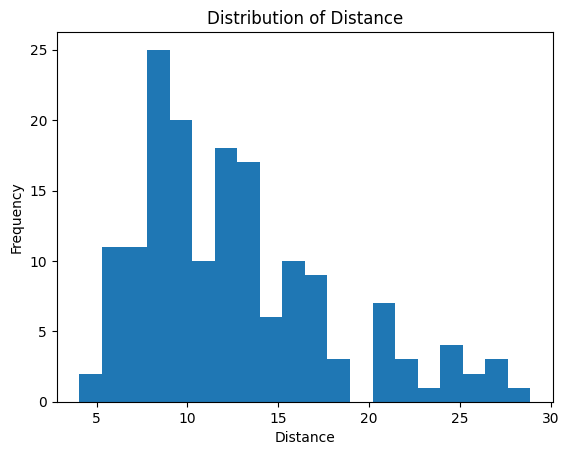

In [37]:
# Explore individual variables
plt.hist(cleaned_data['Distance'], bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()


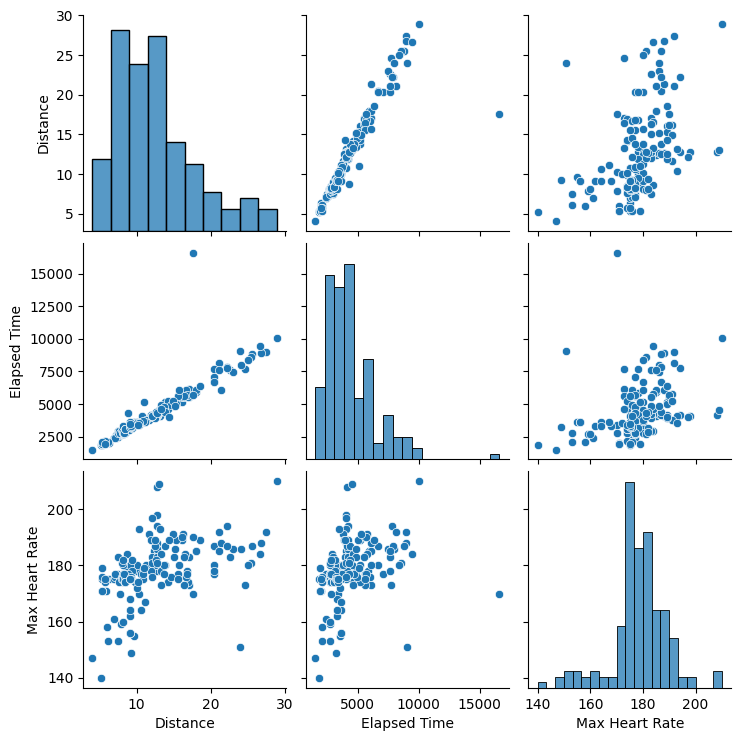

In [38]:
# Explore relationships
sns.pairplot(cleaned_data[['Distance', 'Elapsed Time', 'Max Heart Rate']])
plt.show()

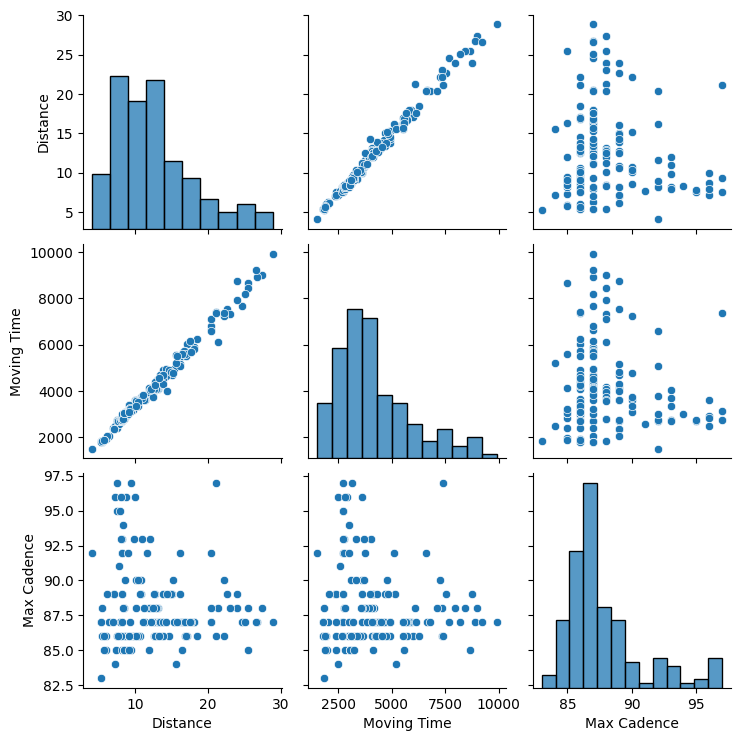

In [39]:
# Explore relationships
sns.pairplot(cleaned_data[['Distance', 'Moving Time', 'Max Cadence']])
plt.show()

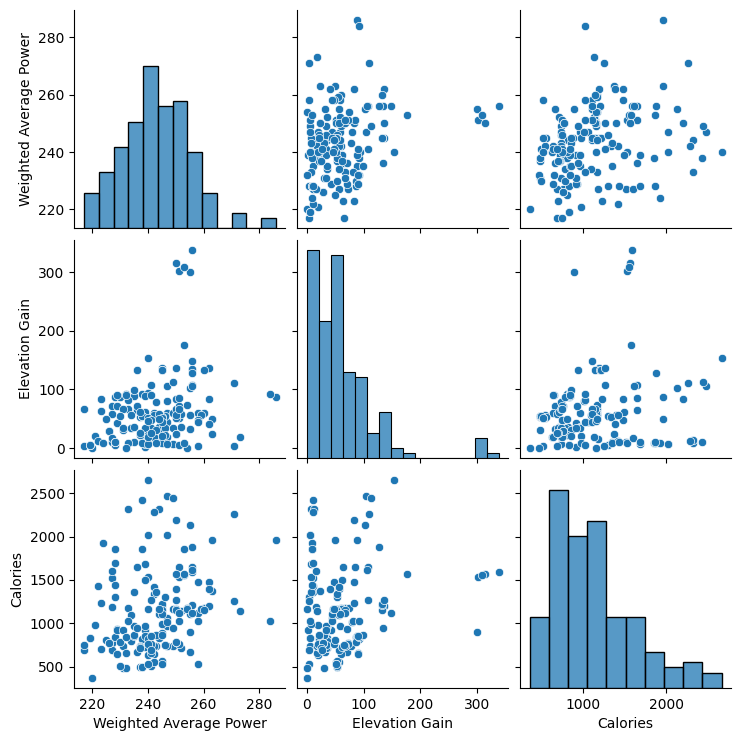

In [40]:
# Explore relationships
sns.pairplot(cleaned_data[['Weighted Average Power', 'Elevation Gain', 'Calories']])
plt.show()

Correlation Matrix

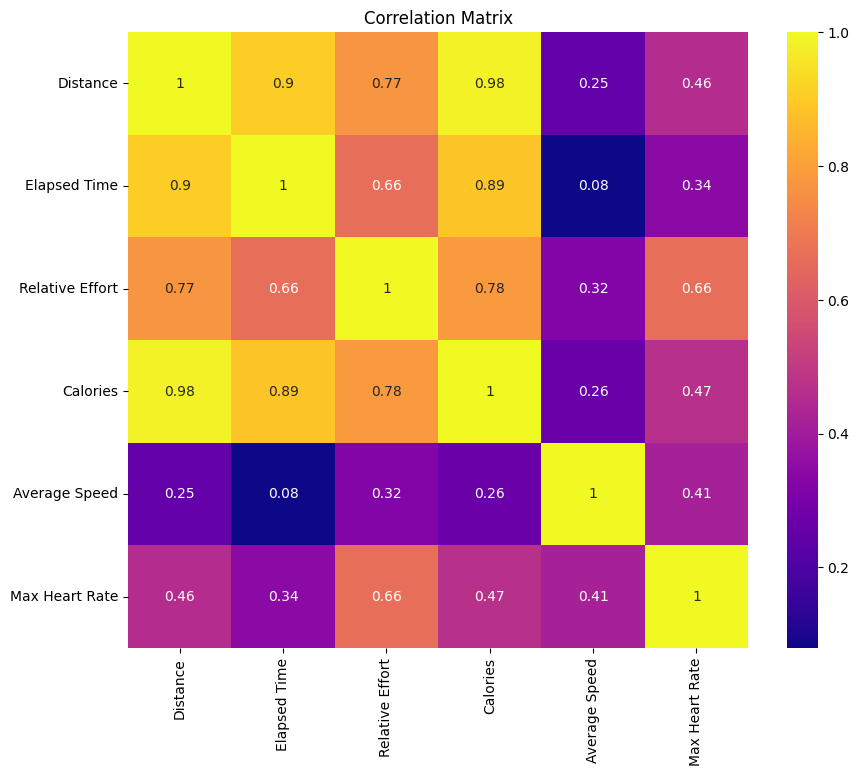

In [41]:
correlation_matrix = cleaned_data[['Distance', 'Elapsed Time' , 'Relative Effort', 'Calories', 'Average Speed', 'Max Heart Rate', ]].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix , annot=True, cmap='plasma')
plt.show()

Insights:

*Distance and Elapsed Time (Correlation = 0.9)*: There is strong positive correlation between the varibales. This is normal as we need more time to cover more distance.

*Distance and Calories (Correlation = 0.98)*:There is a very strong positive correlation between them. This is also expected as there will be more energy expense for covering more distance.

*Distance and Max Heart Rate (Correlation = 0.46)*:  A moderate positive correlation exists between the variables, indicating weaker relationship compared to the ones mentioned above.
Similar case exists between Max Heart Rate and Average Speed (Correlation = 0.403)


*Calories and Elapsed Time (Correlation = 0.89)*: There is a strong positive correlation between the calories and the elapsed time. This indicates that higher the amount of time we spend running, higher the amount of calories burnt.

*Average Speed*: The correlations between average speed and other parameters such as  distance, and elapsed time (0.074) are very low. This indicates weak relationship between the parameters.